In [103]:
import os 
import pandas as pd
import numpy as np

In [104]:
os.getcwd()

'C:\\Users\\C17000032\\Desktop\\Python\\instacart'

In [105]:
os.chdir('C:\\Users\\C17000032\\Desktop\\Python\\instacart')

In [106]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 94A9-E1C5

 Directory of C:\Users\C17000032\Desktop\Python\instacart

03/06/2018  09:59 AM    <DIR>          .
03/06/2018  09:59 AM    <DIR>          ..
03/06/2018  08:59 AM             2,603 aisles.csv
03/06/2018  09:59 AM               270 departments.csv
03/06/2018  08:59 AM       577,550,706 order_products__prior.csv
03/06/2018  09:00 AM        24,680,147 order_products__train.csv
03/06/2018  09:00 AM       108,968,645 orders.csv
03/06/2018  09:00 AM         2,166,953 products.csv
               6 File(s)    713,369,324 bytes
               2 Dir(s)  385,116,135,424 bytes free


In [107]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 94A9-E1C5

 Directory of C:\Users\C17000032\Desktop\Python\instacart

03/06/2018  09:59 AM    <DIR>          .
03/06/2018  09:59 AM    <DIR>          ..
03/06/2018  08:59 AM             2,603 aisles.csv
03/06/2018  09:59 AM               270 departments.csv
03/06/2018  08:59 AM       577,550,706 order_products__prior.csv
03/06/2018  09:00 AM        24,680,147 order_products__train.csv
03/06/2018  09:00 AM       108,968,645 orders.csv
03/06/2018  09:00 AM         2,166,953 products.csv
               6 File(s)    713,369,324 bytes
               2 Dir(s)  385,116,119,040 bytes free


In [108]:
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")

In [109]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [110]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [111]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [112]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [113]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline


In [115]:
order.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [116]:
# lets see how many columns order eval_set

In [117]:
count = order.eval_set.value_counts()

In [118]:
count

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

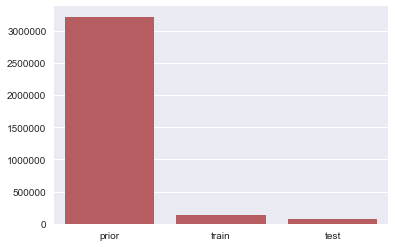

In [119]:
sns.barplot(count.index, count.values, alpha = 1, color = color[2])
plt.figure(figsize=(12,8))

In [120]:
# now lets see how many unique customers are there per the set 

def get_unique_count(x):
    return len(np.unique(x))

count = order.groupby("eval_set")["user_id"].aggregate(get_unique_count)
count


eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [121]:
count = order.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count


,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


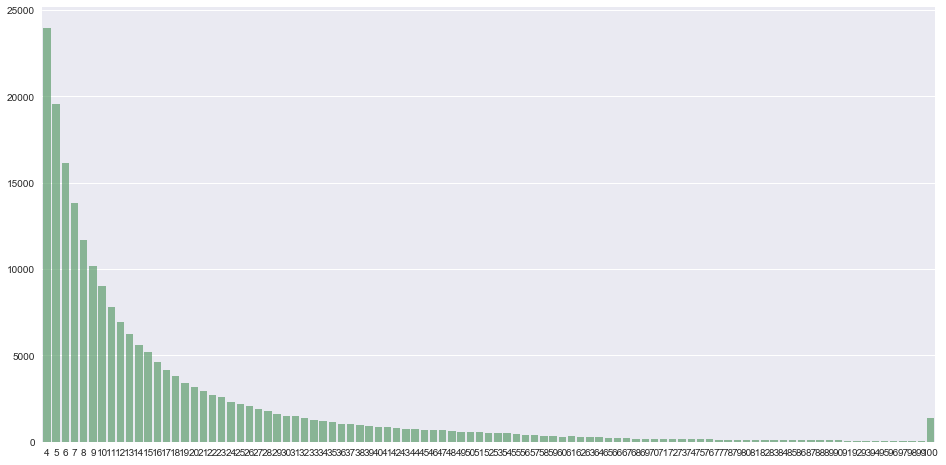

In [122]:
plt.figure(figsize=(16,8))
count = count.order_number.value_counts()

sns.barplot(count.index, count.values, alpha = .7,  color=color[1])

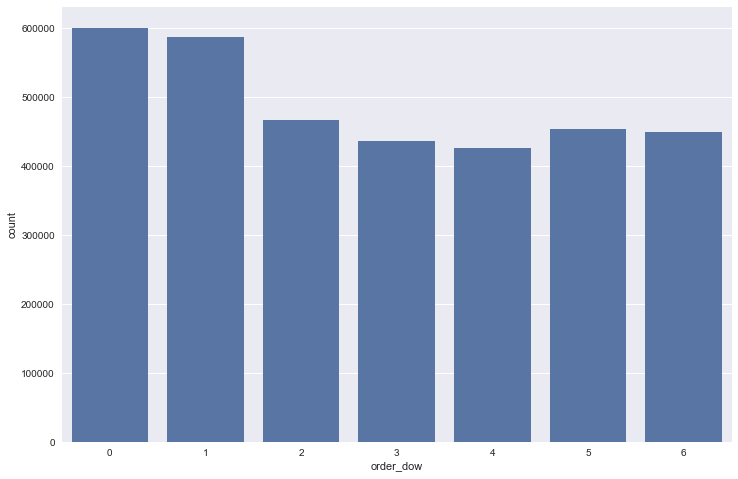

In [123]:
#lets us check which day of the year have these been orders 

plt.figure(figsize =(12,8))
sns.countplot(x = "order_dow", data = order, color = color[0])

In [126]:
# now check the times when these have been ordered


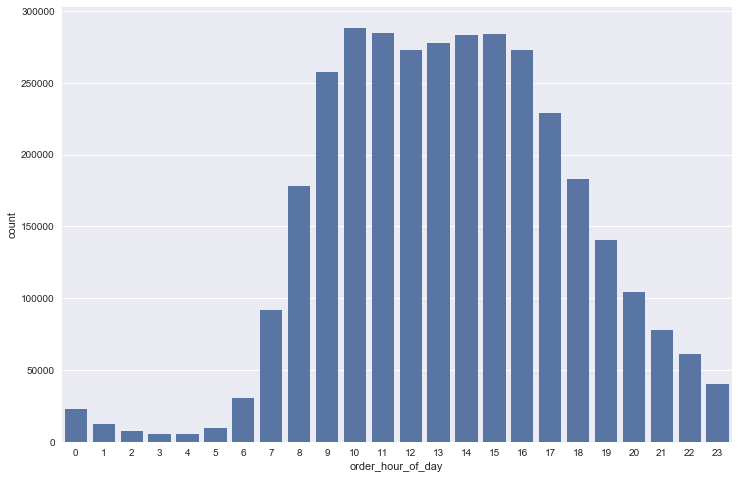

In [127]:
plt.figure(figsize = (12,8))
sns.countplot( x = "order_hour_of_day", data = order, color = color[0])

In [128]:
# now lets combine days of the week and hours of the day to check the time and day concentration of these orders 
grouped = order.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot("order_dow", "order_hour_of_day", "order_number")
grouped


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


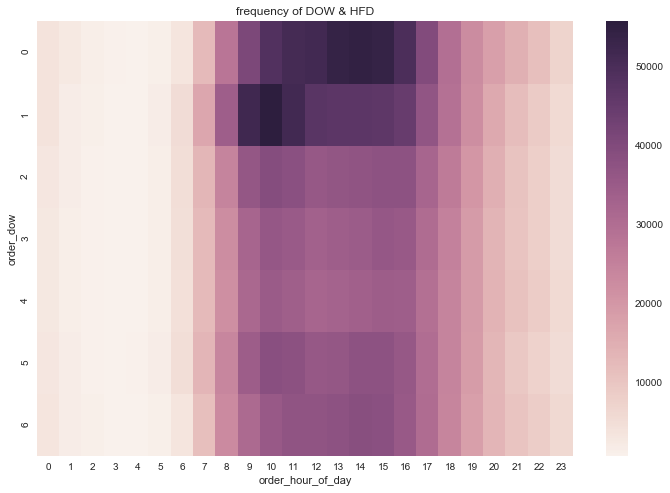

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(grouped)
plt.title("frequency of DOW & HFD")
plt.show()

In [130]:
# from the above we know that 7th hour to 17th hour are peak times for order


In [131]:
# now lets check the time interval between the orders, how frequent are these items ordered 

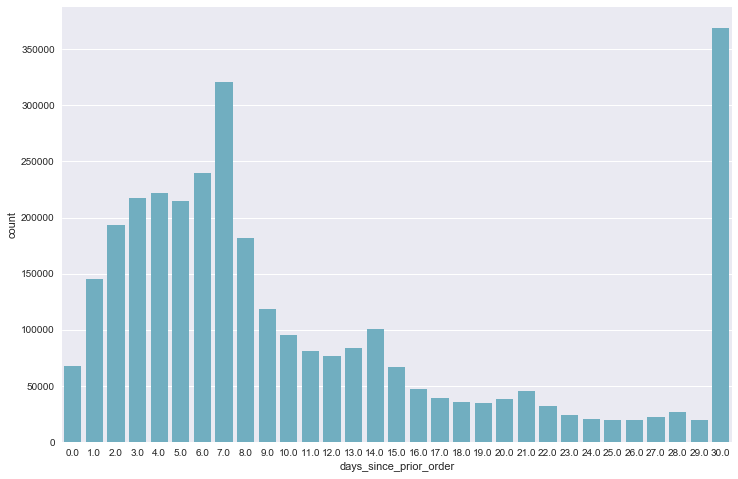

In [132]:
plt.figure(figsize = (12,8))
sns.countplot(x = "days_since_prior_order", data = order, color = color[5] )

In [133]:
# so once in 30 days , once in 7 days a week

In [134]:
#lets find the % of products reorders
order_products_prior.reordered.sum()/order_products_prior.shape[0]

0.5896974667922161

In [135]:
#lets find the % of the reorders in train set 
order_products_train.reordered.sum()/order_products_train.shape[0]

0.5985944127509629

In [136]:
# from the above you will know that 59% of the products are ordered 
#lets check the one that have been not ordered yet 


In [137]:
grouped = order_products_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped["reordered"].loc[grouped["reordered"]>1]=1
grouped.reordered.value_counts()/grouped.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

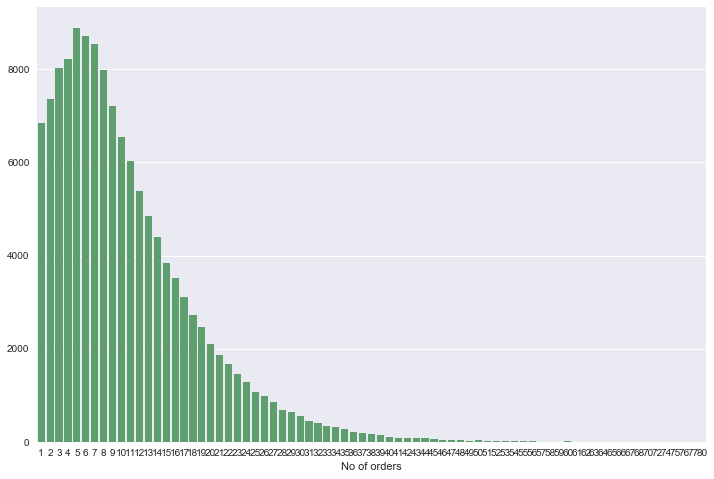

In [138]:
#now lets see if any of the items are brought together 

grouped = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
count = grouped.add_to_cart_order.value_counts()
plt.figure(figsize = (12,8))
sns.barplot(count.index, count.values, color = color[1])
plt.xlabel('No of orders')

In [139]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [140]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [141]:
departments = pd.read_csv("departments.csv")

In [142]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [143]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [144]:
order_products_prior = pd.merge(order_products_prior, products, on = 'product_id', how = 'left')

In [152]:
analysis = order_products_prior['product_name'].value_counts().reset_index().head(60)

In [151]:
analysis

,index,product_name
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [153]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [154]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [155]:
order_products_prior = pd.merge(order_products_prior, order, on = 'order_id', how = 'left')

In [156]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,202279,prior,3,5,9,8.0


In [ ]:
order_products_prior = pd.merge(order_products_prior, departments, on = 'department_id', how = 'left')